## EXPLORACION DE DATOS

In [1]:
#Referencias
#https://realpython.com/python-statistics/
#https://realpython.com/pandas-python-explore-dataset/
import requests
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"
response = requests.get(download_url)
response.raise_for_status()   
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [2]:
import pandas as pd
nba = pd.read_csv("nba_all_elo.csv")
nba.sample(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
58640,29321,198802010CLE,NBA,1,1988,2/1/1988,39,0,DET,Pistons,...,49.966537,CLE,Cavaliers,94,1529.5120,1539.3754,A,L,0.458283,NaN
45011,22506,198102130NYK,NBA,0,1981,2/13/1981,59,0,NYK,Knicks,...,47.611561,DET,Pistons,92,1275.2638,1272.0540,H,W,0.899349,NaN
4608,2305,195211160BLB,NBA,1,1953,11/16/1952,6,0,PHW,Warriors,...,38.409531,BLB,Baltimore,79,1368.9241,1364.2777,A,W,0.515142,at Boston MA


In [3]:
print(nba.shape)

(126314, 23)


In [4]:
#tipos de datos
print(nba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [5]:
#stats
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [6]:
#exploración
print(nba["team_id"].value_counts())

team_id
BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: count, Length: 104, dtype: int64


In [7]:
print(nba["fran_id"].value_counts())

fran_id
Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Water

In [8]:
#quien es el otro lakers
print(nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts())

team_id
LAL    5078
MNL     946
Name: count, dtype: int64


In [9]:
#cuando jugo partidos MNL - equipo antiguo
print(nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max")))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object


In [10]:
#cuantos puntos hicieron los Boston Celtics
print(nba.loc[nba["team_id"] == "BOS", "pts"].sum())

626484


In [11]:
#ejes del dataframe
print(nba.axes)

[RangeIndex(start=0, stop=126314, step=1), Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')]


In [12]:
#revisar presencia de una columna
"pts" in nba.keys()

True

In [13]:
#loc e iloc
colors = pd.Series(
["red", "purple", "blue", "green", "yellow"],
index=[1, 2, 3, 5, 8]
)
print(colors)

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object


In [14]:
print(colors.loc[1])
print(colors.iloc[1])

red
purple


In [15]:
#aplicado a NBA
#penultima fila
print(nba.iloc[-2])

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i               1700.7391
elo_n               1692.0859
win_equiv           59.290245
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i           1813.6349
opp_elo_n           1822.2881
game_location               H
game_result                 L
forecast              0.48145
notes                     NaN
Name: 126312, dtype: object


In [16]:
#combinar filas y columnas
print(nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]])

      fran_id  opp_fran  pts  opp_pts
5555  Pistons  Warriors   83       56
5556  Celtics    Knicks   95       74
5557   Knicks   Celtics   74       95
5558    Kings    Sixers   81       86
5559   Sixers     Kings   86       81


In [17]:
#FILTROS
current_decade = nba[nba["year_id"] > 2010]
print(current_decade.shape)

(12658, 23)


In [18]:
#elegir datos NOT NULL
games_with_notes = nba[nba["notes"].notnull()]
print(games_with_notes.shape)

(5424, 23)


In [19]:
#filtro por caracteres
ers = nba[nba["fran_id"].str.endswith("ers")]
print(ers.shape)

(27797, 23)


In [20]:
#filtro multiple, evitar copia
nba[
(nba["_iscopy"] == 0) &
(nba["pts"] > 100) &
(nba["opp_pts"] > 100) &
(nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,...,38.557545,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.338936,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,...,25.797792,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.281855,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,...,24.876236,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.224238,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,...,19.579676,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.178973,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,...,20.736986,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.253365,at Worcester MA


In [21]:
#otro ejemplo
nba[
(nba["_iscopy"] == 0) &
(nba["team_id"].str.startswith("LA")) &
(nba["year_id"]==1992) &
(nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,...,47.888252,UTA,Jazz,107,1647.5092,1638.4095,H,W,0.499125,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,...,39.395412,POR,Trailblazers,102,1655.1210,1670.3677,H,L,0.406874,"at Las Vegas, NV"


In [22]:
#estadisticas
nba["pts"].sum()

12976235

In [23]:
#agrupar y sumar
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [24]:
#filtro, multi columna y contar
nba[
(nba["fran_id"] == "Spurs") &
(nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [25]:
#manipulación
df = nba.copy()
df.shape

(126314, 23)

In [26]:
df["difference"] = df.pts - df.opp_pts
df.difference.head()

0    -2
1     2
2    16
3   -16
4   -17
Name: difference, dtype: int64

In [27]:
renamed_df = df.rename(
columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [28]:
#DROP
print(df.shape)
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
print(df.shape)

(126314, 24)
(126314, 20)


In [29]:
df["game_location"] = pd.Categorical(df["game_location"])
print(df["game_location"].dtype)

category


In [30]:
#CLEANING
#eliminar registros vacios
rows_without_missing_data = nba.dropna()
print(rows_without_missing_data.shape)

(5424, 23)


In [31]:
#reemplazar datos vacios
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
value="no notes at all",
inplace=True
)
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [32]:
print(data_with_default_notes["notes"])

0         no notes at all
1         no notes at all
2         no notes at all
3         no notes at all
4         no notes at all
               ...       
126309    no notes at all
126310    no notes at all
126311    no notes at all
126312    no notes at all
126313    no notes at all
Name: notes, Length: 126314, dtype: object


In [35]:
#visualización
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

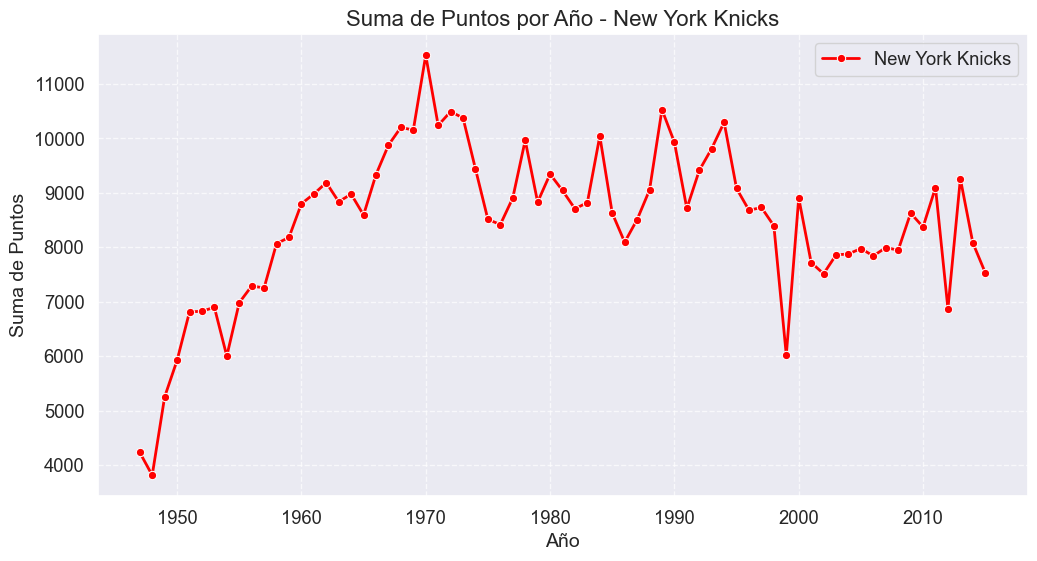

In [58]:
# Filtra los datos para los Knicks y agrupa por año sumando los puntos
knicks_data = nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().reset_index()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Configuración del tamaño del gráfico y de la fuente
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)

# Gráfico de línea con marcadores para la suma de puntos por año
sns.lineplot(data=knicks_data, x="year_id", y="pts", marker='o', color='red', linewidth=2)

# Añadir títulos y etiquetas
plt.title('Suma de Puntos por Año - New York Knicks', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Suma de Puntos', fontsize=14)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustes adicionales si es necesario
plt.xticks(rotation=0)
plt.legend(['New York Knicks'])

# Mostrar el gráfico
plt.show()

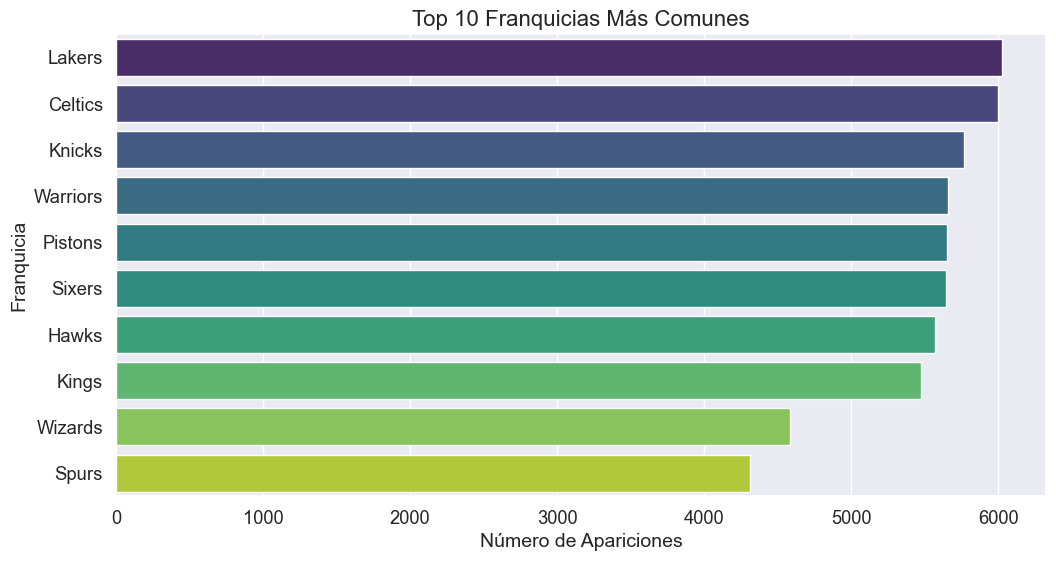

In [53]:
#bar plot
# Obtener las 10 franquicias más comunes
top_franquicias = nba["fran_id"].value_counts().head(10)

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Configuración del tamaño del gráfico y de la fuente
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)

# Gráfico de barras horizontal para las franquicias más comunes
sns.barplot(x=top_franquicias.values, y=top_franquicias.index, hue=top_franquicias.index, palette="viridis", legend=False)

# Añadir títulos y etiquetas
plt.title('Top 10 Franquicias Más Comunes', fontsize=16)
plt.xlabel('Número de Apariciones', fontsize=14)
plt.ylabel('Franquicia', fontsize=14)

# Ajustes adicionales si es necesario
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

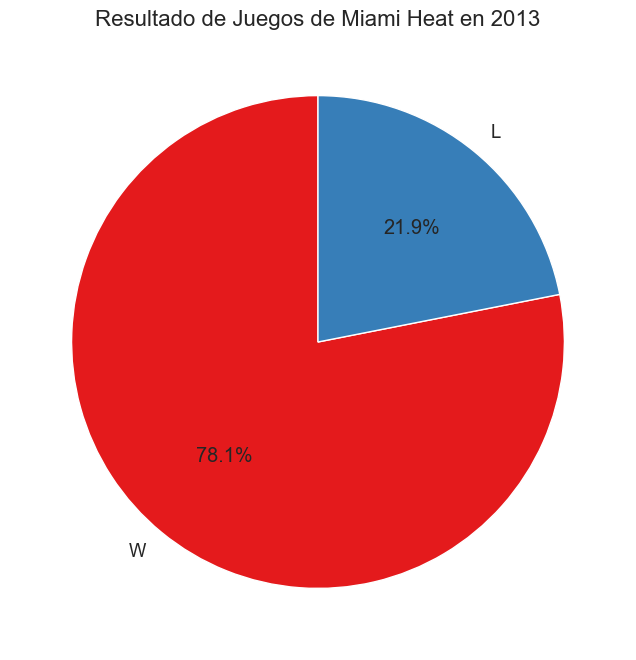

In [57]:
#pie
# Filtrar los datos para los Miami Heat en 2013
heat_2013_data = nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Configuración del tamaño del gráfico y de la fuente
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)

# Gráfico de pastel con colores personalizados
colors = sns.color_palette("Set1")
heat_2013_data.plot(kind="pie", autopct='%1.1f%%', colors=colors, startangle=90)

# Añadir título
plt.title('Resultado de Juegos de Miami Heat en 2013', fontsize=16)

# Ajustes adicionales si es necesario
plt.ylabel('')  # Eliminar etiqueta del eje y

# Mostrar el gráfico
plt.show()

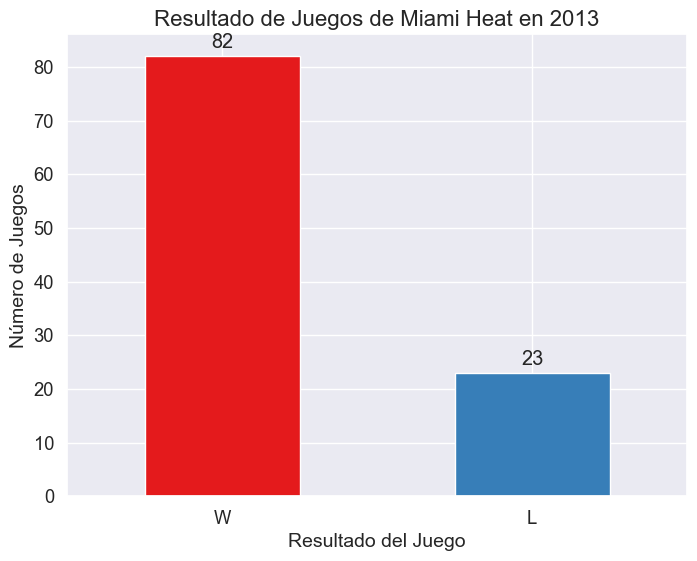

In [60]:
# Filtrar los datos para los Miami Heat en 2013
heat_2013_data = nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Configuración del tamaño del gráfico y de la fuente
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Gráfico de barras horizontal con colores personalizados
colors = sns.color_palette("Set1")
ax = heat_2013_data.plot(kind="bar", color=colors)

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir título y etiquetas
plt.title('Resultado de Juegos de Miami Heat en 2013', fontsize=16)
plt.xlabel('Resultado del Juego', fontsize=14)
plt.ylabel('Número de Juegos', fontsize=14)

# Ajustes adicionales si es necesario
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()